# Explorative Data Analysis in Action: global power plant distribution

In the subsequent notebooks we apply a variety of EDA techniques on a real world data set.

The data set [__Global Power-Plants__](https://www.kaggle.com/ramjasmaurya/global-powerplants) is avaiable on [Kaggle](https://www.kaggle.com/).



It was already downloaded for you and is found in the `datasets` folder:

    ../data/powerplants.csv

<img src="./_img/power_plant.webp"> 

Source: [The Quint](https://www.thequint.com/news/environment/thermal-power-plants-use-up-more-water-than-permitted-rti-data-shows/).

### Content

This dataset consists of information about power plants worldwide. Each record includes the name, country, energy source type, geographic location, start date and other data elements. In this data analysis we want to learn someting about the geospatial distribution and the energy share of power plants in the world and in specific regions. Referring to the global goals of reducing the greenhouse gas emissions the energy production sector is one of the most important one. Actual knowledge about the specific energy share of green / fossil energy source and its change in time is therefore an important information for political decissions. 



# Data preparation

**Import statements**

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../src")

plt.rcParams["figure.figsize"] = [20,9]

![](./_img/Time_data_science.png)

Source: [Gil Press (2016)](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#55852a146f63)

## Reading the Dataset

In [16]:
pp = pd.read_csv("../data/powerplants.csv")

In [17]:
pp.shape

(34936, 16)

In [18]:
pp.sample(10)

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
12324,FRA,France,Valonne,10.0,47.3422,6.6686,Wind,NaN,NaN,NaN,NaN,NaN,Open Power System Data,NaN,NaN,18.28
23822,GBR,United Kingdom,Oak Grove Biomass Facility,2.0,52.7686,1.3564,Biomass,NaN,NaN,NaN,NaN,Oak Grove Renewables,UK Renewable Energy Planning Database,NaN,NaN,NaN
30909,USA,United States of America,Oak Leaf Solar XXX LLC (CSG),1.5,37.4534,-105.8780,Solar,NaN,NaN,NaN,2019.000000,Greenbacker Renewable Energy Corporation,U.S. Energy Information Administration,4.117,U.S. Energy Information Administration,2.44
16512,JPN,Japan,Fukushima Daina,4400.0,37.3164,141.0265,Nuclear,NaN,NaN,NaN,NaN,Tokyo,GEODB,NaN,NaN,35148.73
9699,CZE,Czech Republic,Předbořice Solar Power Plant,1.5,49.6090,14.8302,Solar,NaN,NaN,NaN,NaN,SunField,Industry About,NaN,NaN,1.97
19920,ZAF,South Africa,Dorper Wind Farm,100.0,-31.4802,26.4407,Wind,NaN,NaN,NaN,2014.000000,Dorper Wind Development,WRI,NaN,NaN,315.54
21018,SDN,Sudan,Khartoum North,351.0,15.6500,32.5630,Oil,NaN,NaN,NaN,NaN,NaN,Power Africa,NaN,NaN,1136.70
7611,CHN,China,Ningdong I,10.0,37.8480,106.6400,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,16.31
31190,USA,United States of America,Painesville,55.5,41.7265,-81.2540,Coal,Oil,Gas,NaN,1972.747748,City of Painesville,U.S. Energy Information Administration,2.656,U.S. Energy Information Administration,256.36
3707,CAN,Canada,Brandon,98.0,49.8453,-99.8918,Coal,NaN,NaN,NaN,1958.000000,Manitoba Hydro,WRI,NaN,NaN,646.29


## Data Cleaning

[Data cleansing or data cleaning](https://en.wikipedia.org/wiki/Data_cleansing) is the process of **detecting and correcting (or removing) corrupt or inaccurate records** from a record set, table, or database and refers to **identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data**.

### Dealing with incomplete (`NaN`) and irrelevant data

Missing values in data sets are a well-known problem as nearly everywhere, where data is measured and recorded, issues with missing values occur. Various reasons lead to missing values: values may not be measured, values may be measured but get lost or values may be measured but are considered unusable. Missing values can lead to problems, because often further data processing and analysis steps rely on complete data sets. Therefore missing values need to be replaced with reasonable values. In statistics this process is called **imputation**.

When faced with the problem of missing values it is important to understand the mechanism that causes missing data. Such an understanding is useful, as it may be employed as background knowledge for selecting an appropriate imputation strategy. 

**Check for `NaN`**

Note that in many cases missing values are assigned special characters, such as `-999`, `NA`, `k.A.` etc.; hence, you as a data analyst are responsible for taking appropriate action.    

In [19]:
pp.shape[0]

34936

In [20]:
pp.notnull().sum()

country code                     34936
country                          34936
name of powerplant               34936
capacity in MW                   34936
latitude                         34936
longitude                        34936
primary_fuel                     34936
secondary fuel                    1944
other_fuel 1                       276
other_fuel 2                        92
start date                       17447
owner of plant                   20868
geolocation_source               34517
generation_gwh_2020               9659
generation_data_source           11400
estimated_generation_gwh_2020    33138
dtype: int64

In [21]:
pp.isnull().sum()

country code                         0
country                              0
name of powerplant                   0
capacity in MW                       0
latitude                             0
longitude                            0
primary_fuel                         0
secondary fuel                   32992
other_fuel 1                     34660
other_fuel 2                     34844
start date                       17489
owner of plant                   14068
geolocation_source                 419
generation_gwh_2020              25277
generation_data_source           23536
estimated_generation_gwh_2020     1798
dtype: int64

In [22]:
# show relative ratios in percent
((pp.isnull().sum() / pp.shape[0]) * 100).round(2)

country code                      0.00
country                           0.00
name of powerplant                0.00
capacity in MW                    0.00
latitude                          0.00
longitude                         0.00
primary_fuel                      0.00
secondary fuel                   94.44
other_fuel 1                     99.21
other_fuel 2                     99.74
start date                       50.06
owner of plant                   40.27
geolocation_source                1.20
generation_gwh_2020              72.35
generation_data_source           67.37
estimated_generation_gwh_2020     5.15
dtype: float64

**Strategies to deal with missing data in Python**

In general there are many options to consider when imputing missing values, for example:
* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

There are some libraries implementing more or less advanced missing value imputation strategies such as 

* [`statsmodels`](http://www.statsmodels.org/dev/imputation.html) ([Multiple Imputation with Chained Equations (MICE)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/))
* [`fancyimpute`](https://github.com/iskandr/fancyimpute) (matrix completion and imputation algorithms)
* [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) (mean, median, most frequent)
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) ([`fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html), [`interpolate`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html) methods)


**Our working strategy to deal with missing data**

_Owing to the fact that the amount of missing values in our data set is considerable high and that we can not easily do predictions or assumptions for the specific missing values, we simply remove these columns with a high amount of missing data._ 

_Nethertheless we have to keep in mind that our dataset still consists of gaps. Therefore we have to handle these gaps individually in the following analysis._

In [23]:
pp

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,NaN,NaN,NaN,NaN,ZESCO,Power Africa,NaN,NaN,183.79
34932,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,NaN,NaN,NaN,NaN,ZESCO,Power Africa,NaN,NaN,73.51
34933,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,ZESCO,Power Africa,NaN,NaN,578.32
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,2785.10


> **Challenge:** Drop all columns in the dataframe that have more than 60 percent null values. Refactor your code afterwards and externalise your code into a function that takes the original dataframe and a threshold. The function should return the new dataframe.

> **Hint**: Make use of the `df.index` attribute.

In [24]:
# Hint: The index attribute allows us to extract the column names in this case
ratios = ((pp.isnull().sum() / pp.shape[0]) * 100).round(2)
display(ratios)
# for example here are the columns for which the "missing-ness" ratio is 0
print() # new line
print("Columns with a ratio of 0")
display(ratios.loc[ratios == 0.0].index)

country code                      0.00
country                           0.00
name of powerplant                0.00
capacity in MW                    0.00
latitude                          0.00
longitude                         0.00
primary_fuel                      0.00
secondary fuel                   94.44
other_fuel 1                     99.21
other_fuel 2                     99.74
start date                       50.06
owner of plant                   40.27
geolocation_source                1.20
generation_gwh_2020              72.35
generation_data_source           67.37
estimated_generation_gwh_2020     5.15
dtype: float64


Columns with a ratio of 0


Index(['country code', 'country', 'name of powerplant', 'capacity in MW',
       'latitude', 'longitude', 'primary_fuel'],
      dtype='object')

In [25]:
## Your code here


In [37]:
# %load ../src/_solutions/filter_dataframe.py
def filter_dataframe(df, threshold):
    # build pandas Series containing column name as index and ratio as value
    ratios = ((df.isnull().sum() / df.shape[0]) * 100).round(2)
    # get column names (index) for which ratio is under threshold
    columns_to_keep = ratios.loc[ratios <= threshold].index
    # get column names (index) for which ratio is over threshold
    columns_to_drop = ratios.loc[ratios > threshold].index
    # print dropped columns just to give info
    print(f"Dropped columns: {list(columns_to_drop)}")
    # return DataFrame only containing desired columns
    return df[columns_to_keep].copy()

In [38]:
print(f"Number of columns before cleanup: {pp.shape[1]}")
pp = filter_dataframe(pp, threshold=60)
print(f"Number of columns after cleanup: {pp.shape[1]}")

Number of columns before cleanup: 11
Dropped columns: []
Number of columns after cleanup: 11


## Dealing with data structures

Upon closer inspection we see that the `start date` column is stored as a floating point number only containing a year (which is rather an integer, isn't it?).

For simplicity let's transform it to integer numbers.

In [39]:
pp[["country code", "start date"]].sample(10, random_state=42)

,country code,start date
3248,BRA,2013
31075,USA,1986
16815,JPN,-1
12538,DEU,-1
3219,BRA,2008
15575,IND,1999
23999,GBR,-1
24459,GBR,-1
7275,CHN,-1
18494,POL,-1


In [40]:
pp['start date'].dtype

dtype('int32')

In order to transform the column to a integer datatype we have to deal with the `NaN` values.

For example by assigning a distinct value that can't be achieved inside the column itself.


In [41]:
pp["start date"].fillna(-1, inplace=True)
pp["start date"] = pp["start date"].astype(int)

In [42]:
pp[["country code", "start date"]].sample(10, random_state=42)

,country code,start date
3248,BRA,2013
31075,USA,1986
16815,JPN,-1
12538,DEU,-1
3219,BRA,2008
15575,IND,1999
23999,GBR,-1
24459,GBR,-1
7275,CHN,-1
18494,POL,-1


## Visualisation of spatial datasets

_Note: In the subsequent cells we load Python library for spatial data analysis, such as `shapely`, `fiona`, `geopandas`, `cartopy` and `folium`. Make sure that you have installed the [GDAL bindings](http://www.gdal.org/index.html) on your computer._

In this section we make use third party libraries for visualisation of the geospatial information, such as [GeoPandas](http://geopandas.org/index.html) and [shapely](http://toblerity.org/shapely/), which abstract away many algorithmic or computational issues related to spatial data processing and plotting by integrating the workhorses of geospatial computing, such as [GEOS](http://trac.osgeo.org/geos/), [GDAL](http://www.gdal.org/), [OGR](http://gdal.org/1.11/ogr/) and [proj.4](http://proj4.org/), among others.

The geographical information is stored and given by the `latitude` and `longitude` column. We can use these information to localize each power plant in the world.

**Transform the variables `Target Latitude` and `Target Longitude` to spatial coordinates**

In [43]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(pp['longitude'], pp['latitude'])]
geometry[0:5]

[<POINT (65.119 32.322)>,
 <POINT (65.795 31.67)>,
 <POINT (65.792 31.623)>,
 <POINT (69.479 34.556)>,
 <POINT (69.717 34.641)>]

The `Point` class does not yield any useful information upon printing it. 

However it contains `x` and `y` attributes that map our longitudes and latitudes onto x-y coordinates.

In [44]:
point_0 = geometry[0]
print(point_0.x)
print(point_0.y)

65.119
32.322


It is nothing more than a slightly more efficient way of storing coordinates. 

And the library that will allow us to describe coordinates uses exactly this representation.

**Use the GeoPandas to make a pandas `DataFrame` spatially aware.**

[GeoPandas](http://geopandas.org/index.html) extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [shapely](http://toblerity.org/shapely/). GeoPandas further depends on [fiona](http://toblerity.org/fiona/README.html) for file access and descartes and [matplotlib](https://matplotlib.org/) for plotting.

It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. 

In [45]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(pp, geometry=geometry)
gdf.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,geolocation_source,estimated_generation_gwh_2020,geometry
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,-1,NaN,GEODB,119.50,POINT (65.11900 32.32200)
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,-1,NaN,Wiki-Solar,18.29,POINT (65.79500 31.67000)
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,-1,NaN,Wiki-Solar,18.72,POINT (65.79200 31.62300)
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,-1,NaN,GEODB,174.91,POINT (69.47870 34.55600)
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,-1,NaN,GEODB,350.80,POINT (69.71700 34.64100)


**Make sure that for every entry we have a valid spatial coordinates**

In [46]:
print(gdf.shape)
# subset only vaild spatial coordinates
gdf = gdf.loc[gdf[['longitude', 'latitude']].notnull().all(axis = 1)]
print(gdf.shape)
gdf[['longitude', 'latitude']].isnull().sum()

(34936, 12)
(34936, 12)


longitude    0
latitude     0
dtype: int64

**Assign a spatial coordinate reference system (`crs`) to our GeoPandas object**

In general the CRS may be defined in several ways, for example the CRS may be defined as [Well-known text (WKT)](https://en.wikipedia.org/wiki/Well-known_text) format, or [JSON](https://en.wikipedia.org/wiki/JSON) format, or [GML](https://en.wikipedia.org/wiki/Geography_Markup_Language) format, or in the [Proj4](https://en.wikipedia.org/wiki/PROJ.4) format, among many others.

The Proj4 format is a generic, string-based description of a CRS. It defines projection types and parameter values for particular projections. For instance the Proj4 format string for the [European Terrestrial Reference System 1989 (ETRS89)](https://en.wikipedia.org/wiki/European_Terrestrial_Reference_System_1989) is:

    +proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no\_defs

With respect to the enormous amount of existing CRS the [International Association of Oil & Gas Producers (IOGP)](https://en.wikipedia.org/wiki/International_Association_of_Oil_%26_Gas_Producers), formerly known as **_European Petroleum Survey Group (EPSG)_**, built a collection of definitions for global, regional, national and local coordinate reference systems and coordinate transformations, the [EPSG Geodetic Parameter Dataset](http://www.epsg.org/). Within this collection each particular coordinate reference systems gets an unique integer identifier, commonly denoted as EPSG. For instance, the EPSG identifier for the the latest revision of the [World Geodetic System (WGS84)](https://en.wikipedia.org/wiki/World_Geodetic_System) is simply [4326](http://spatialreference.org/ref/epsg/4326/).


A nice look up page for different coordinate reference systems is found [here](https://epsg.io/) and a fancy visualization of many prominent map projections is found [here](https://bl.ocks.org/mbostock/raw/3711652/).


In [47]:
gdf.set_crs('epsg:4326', inplace=True)

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,geolocation_source,estimated_generation_gwh_2020,geometry
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,-1,NaN,GEODB,119.50,POINT (65.11900 32.32200)
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,-1,NaN,Wiki-Solar,18.29,POINT (65.79500 31.67000)
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,-1,NaN,Wiki-Solar,18.72,POINT (65.79200 31.62300)
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,-1,NaN,GEODB,174.91,POINT (69.47870 34.55600)
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,-1,NaN,GEODB,350.80,POINT (69.71700 34.64100)
...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,-1,ZESCO,Power Africa,183.79,POINT (28.63330 -12.96670)
34932,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,-1,ZESCO,Power Africa,73.51,POINT (28.20000 -12.81670)
34933,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,-1,ZESCO,Power Africa,578.32,POINT (25.85000 -17.91670)
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,-1,NaN,GEODB,2785.10,POINT (26.47000 -18.38350)


### Context matters: Load _Natural Earth countries_ dataset, bundled with GeoPandas

[Natural Earth](http://www.naturalearthdata.com/) is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software. A subset comes bundled with GeoPandas and is accessible from the `gpd.datasets` module. We’ll use it as a helpful global base layer map.



In [48]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [49]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

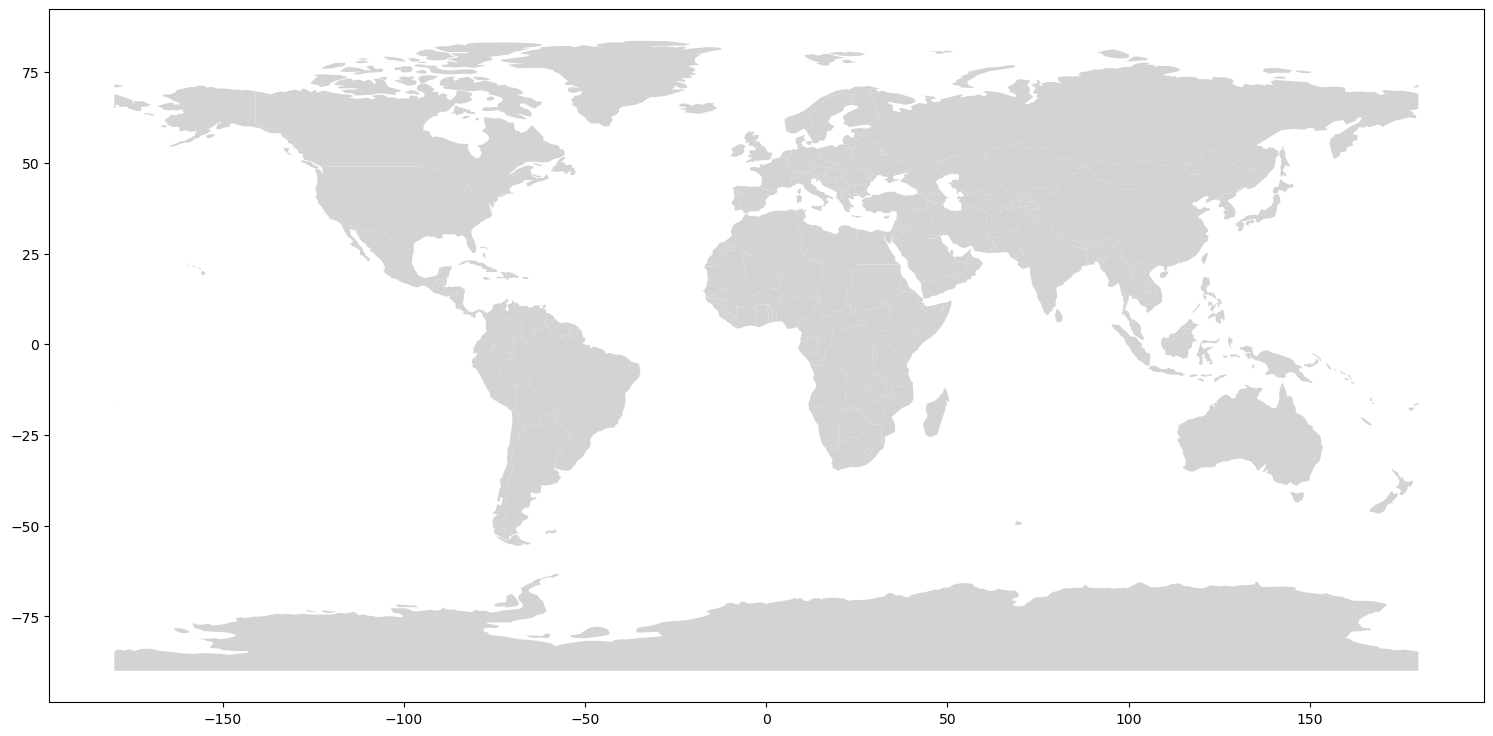

In [50]:
world.plot(facecolor='lightgray')

**Combine world map and the power plant data set**

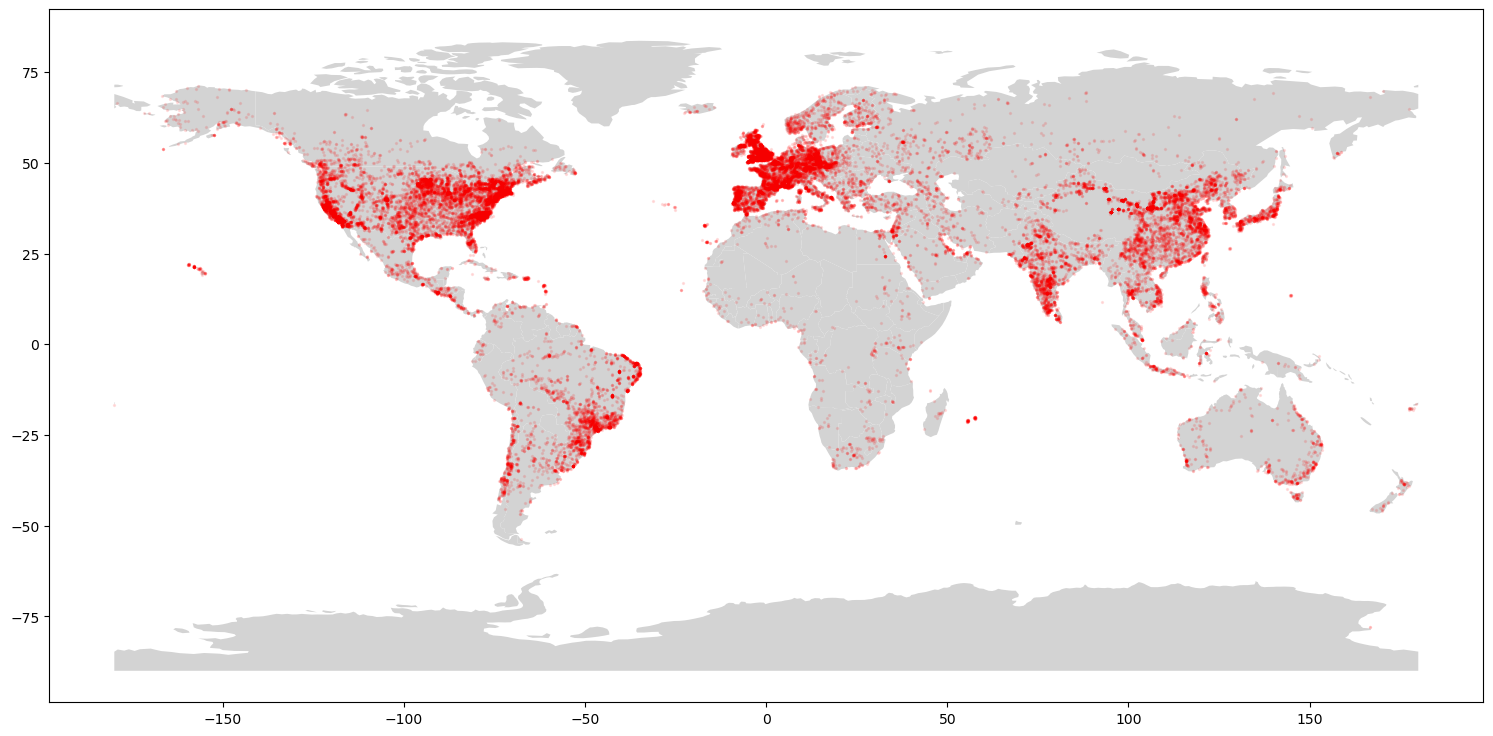

In [51]:
base = world.plot(facecolor='lightgray') # create base plot (world map)
gdf.plot(
    ax=base,         # specify object to plot over
    marker='o',      # select shape of each plotted point (circle, cross, etc.)
    color='red',     # color
    markersize=2,    # size of each plotted point
    alpha=0.1        # transparency of each plotted point (areas with less powerplants will become less visible)
);

### Spatial Filtering the data by geolocation

In a world view the points observations overlap each over a lot. So we can not see any pattern. For those purpose it is usefull, to set the focus of the research to a specific geographical region. In the following we want to focus on a continental and a country view.

**Europe focus**

As a first example we want to restrict our analysis to data points, which refer to an area within Europe. Although it is not straightforward to define Europe as an entity, in terms of geography, politics or sphere of cultural identity, we define Europe as an area between the coordinates  

$$\text{33.0 to 73.5°N and 27.0°W to 45.0°E.}$$

In order to represent that area spatially; we construct a `Polygon` object to represent the [bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) of Europe. 

In [52]:
from shapely.geometry import Polygon
# generate geopandas object
poly_europe = gpd.GeoSeries([Polygon([(-27,33), (45,33), (45,73.5), (-27,73.5)])])
bb_europe = gpd.GeoDataFrame({'geometry': poly_europe})
# assign crs
bb_europe.set_crs(epsg=4326, inplace=True)
bb_europe

,geometry
0,"POLYGON ((-27.00000 33.00000, 45.00000 33.0000..."


**Plot world map and bounding box of Europe**

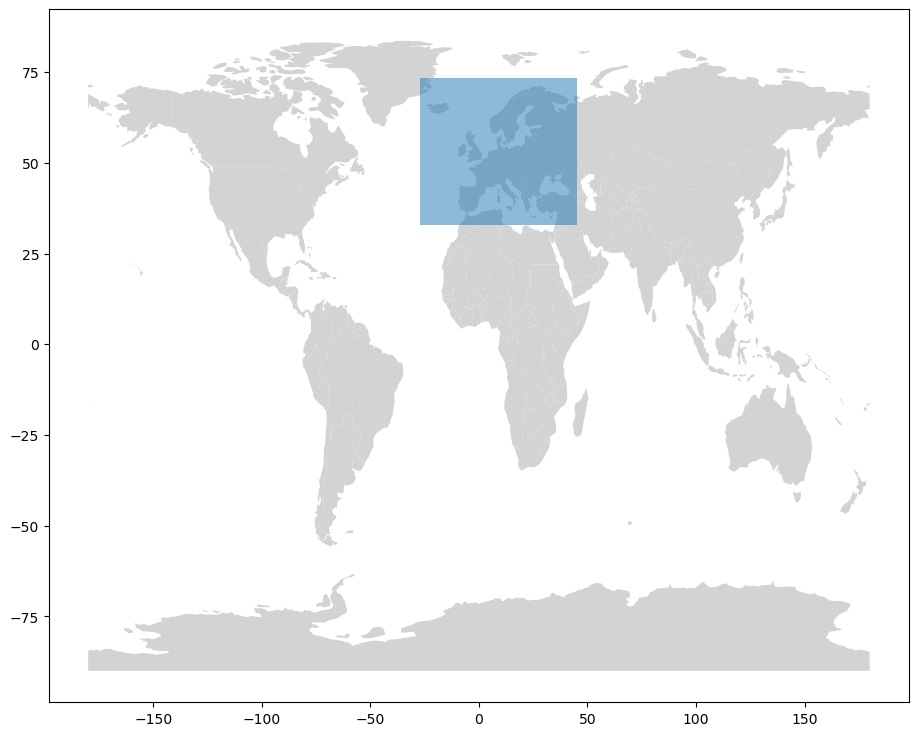

In [53]:
base = world.plot(facecolor='lightgray')
bb_europe.plot(ax=base, alpha=0.5);

In [54]:
https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

SyntaxError: invalid syntax (3203909490.py, line 1)

**Subset (intersect) the GeoPandas `DataFrame` with the bounding box of Europe**

In [55]:
gdf_europe = gpd.sjoin(gdf, bb_europe, how="inner", predicate='intersects').drop("index_right", axis=1)

print(gdf_europe.shape)

(10645, 12)


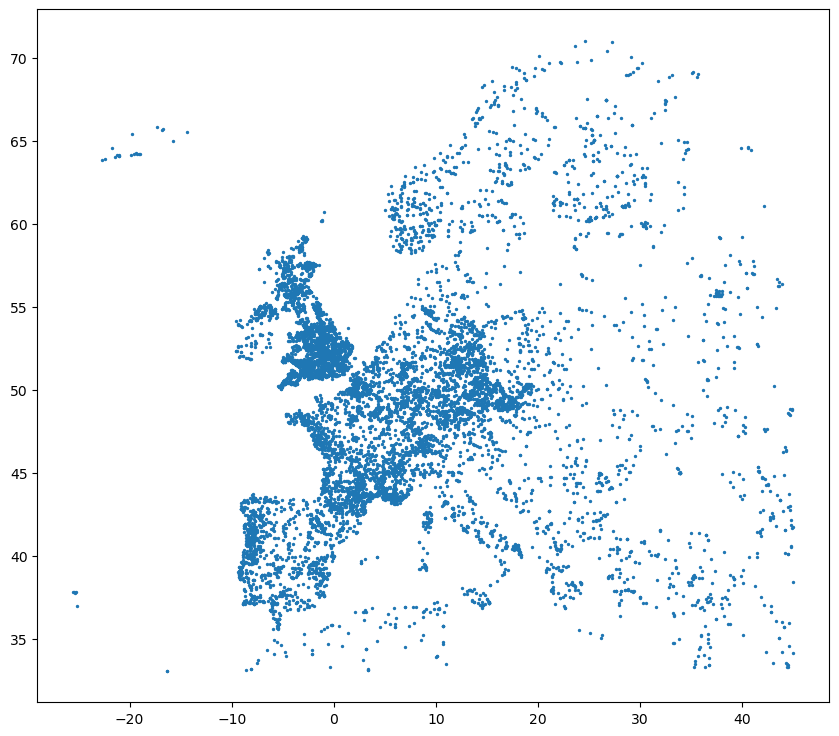

In [56]:
gdf_europe.plot(markersize=2);

**We catch a bit of the African and Asian continent**

Fortunately the Naturalearth dataset also contains continent definitions. We can again subset these together to take the intersection of both definitions of Europe.

In [57]:
gdf_europe = gpd.overlay(gdf_europe, world.loc[world['continent'] == 'Europe'], how='intersection')
print(gdf_europe.shape)

(9969, 17)


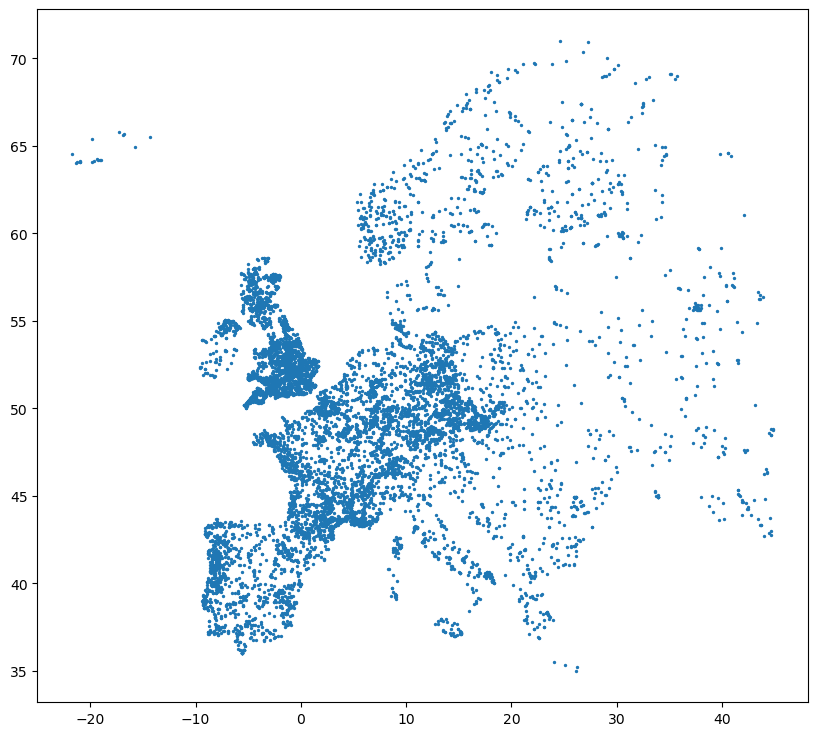

In [58]:
gdf_europe.plot(markersize=2);

Note that the result again is not perfect as we don't include the european part of Turkey for example.
However the Naturalearth dataset alone also counts Russia and some islands far away from the European continent as Europe.

This definition of Europe should be sufficient for our analysis. Although feel free to bring in your own if needed.

<AxesSubplot: >

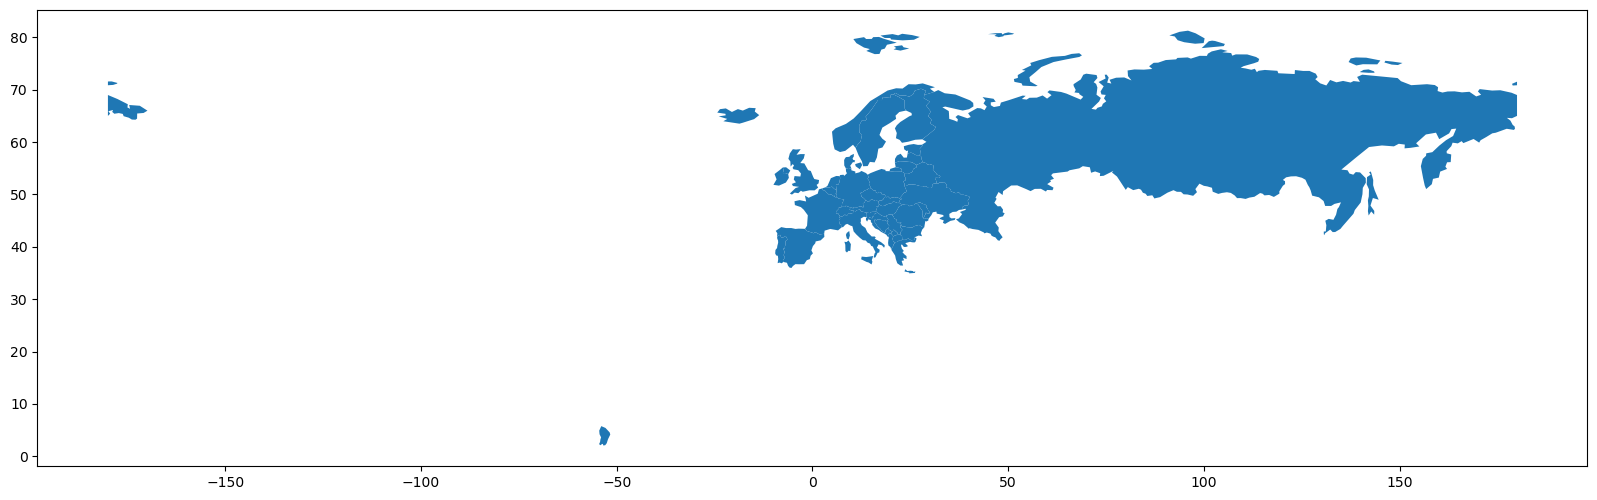

In [59]:
world.loc[world['continent'] == 'Europe'].plot()

**In order to keep the spatial context we extract the area of Europe from the world map**

In [60]:
europe = gpd.overlay(world, bb_europe, how='intersection')
europe.set_crs('epsg:4326', inplace=True);

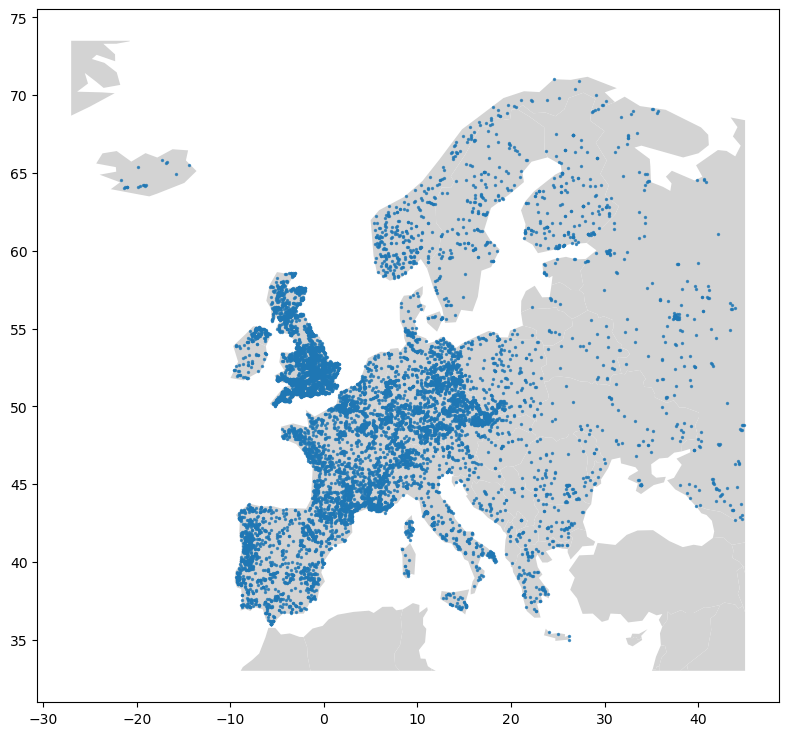

In [61]:
base = europe.plot(facecolor='lightgray')
gdf_europe.plot(ax=base, marker='o', markersize=2, alpha=0.75);

## Dealing with categorical data

`geopandas` includes `column`, `categorical` and `legend` keywords in order to better distinguish between individual types of data inside the plot. 

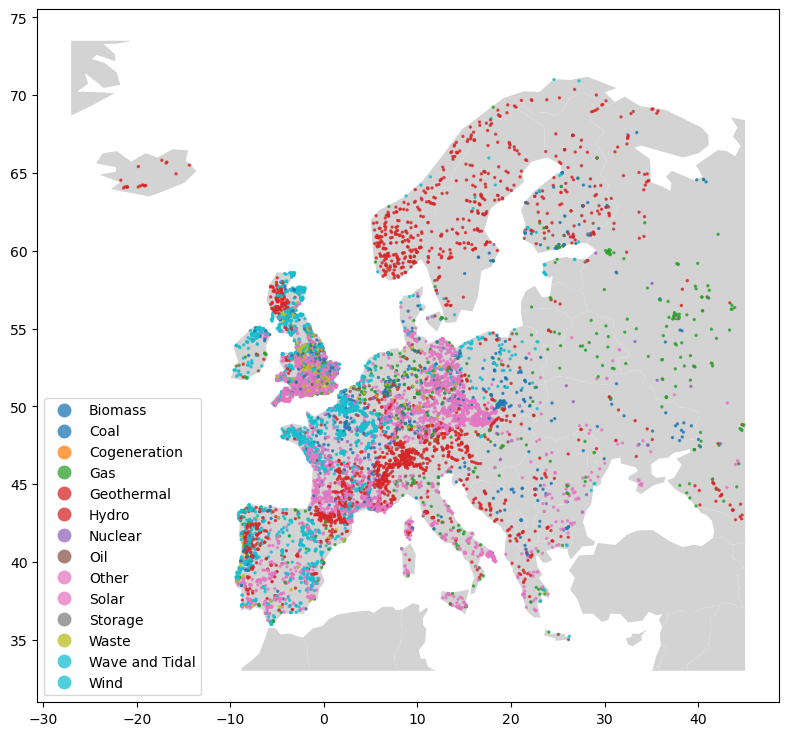

In [62]:
base = europe.plot(facecolor='lightgray')
gdf_europe.plot(ax=base, marker='o', markersize=2, alpha=0.75, column='primary_fuel', categorical=True, legend=True);

### Choosing individual sub-categories

As our dataset provides many categories the resulting plot is not necessarily ideal.

Way too many categories are displayed and some even share the same color.

One way to circumvent this is to chose individual categories we want to display.
For example only the most prominent in the dataset.

In [63]:
gdf_europe["primary_fuel"].value_counts()

Solar             3748
Wind              2131
Hydro             1983
Gas                620
Biomass            487
Waste              432
Coal               325
Oil                 88
Nuclear             64
Geothermal          36
Storage             28
Other               19
Cogeneration         6
Wave and Tidal       2
Name: primary_fuel, dtype: int64

In [64]:
# only get top-5 categories
gdf_europe["primary_fuel"].value_counts().iloc[:5]

Solar      3748
Wind       2131
Hydro      1983
Gas         620
Biomass     487
Name: primary_fuel, dtype: int64

In [65]:
top_5_fuels = gdf_europe["primary_fuel"].value_counts().iloc[:5].index

<AxesSubplot: >

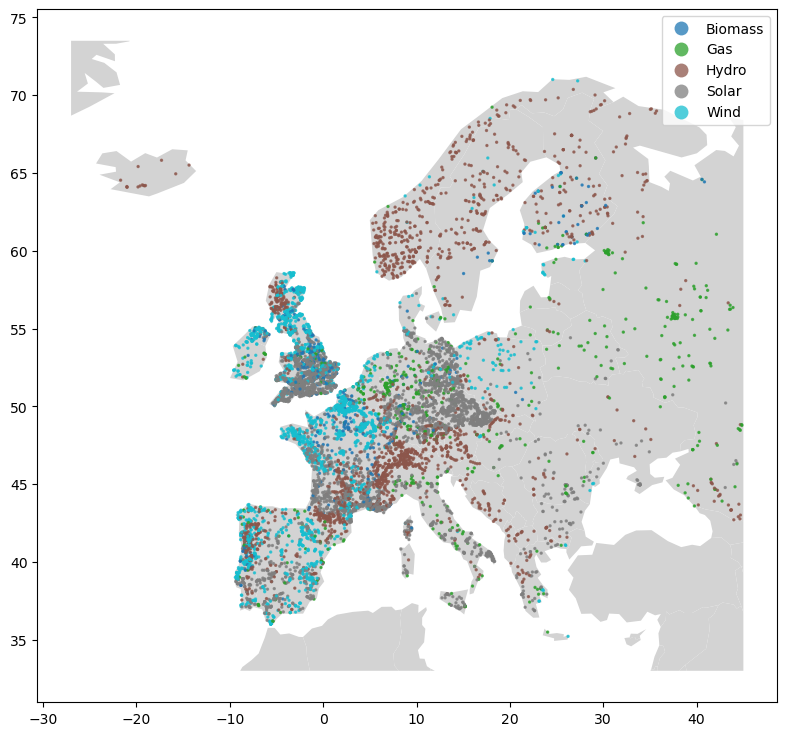

In [66]:
base = europe.plot(facecolor='lightgray')
gdf_europe.loc[gdf_europe["primary_fuel"].isin(top_5_fuels)].plot(
        ax=base,                # plotting object to plot over
        marker='o',             # marker shape
        markersize=2,           # marker size
        alpha=0.75,             # transparency
        column='primary_fuel',  # column to pick categories from
        categorical=True,       # force the plot to chose different colors for individual categories
        legend=True             # include legend
)

**Colors this way are selected by GeoPandas and may be unfitting. For better control we can loop over each fuel**

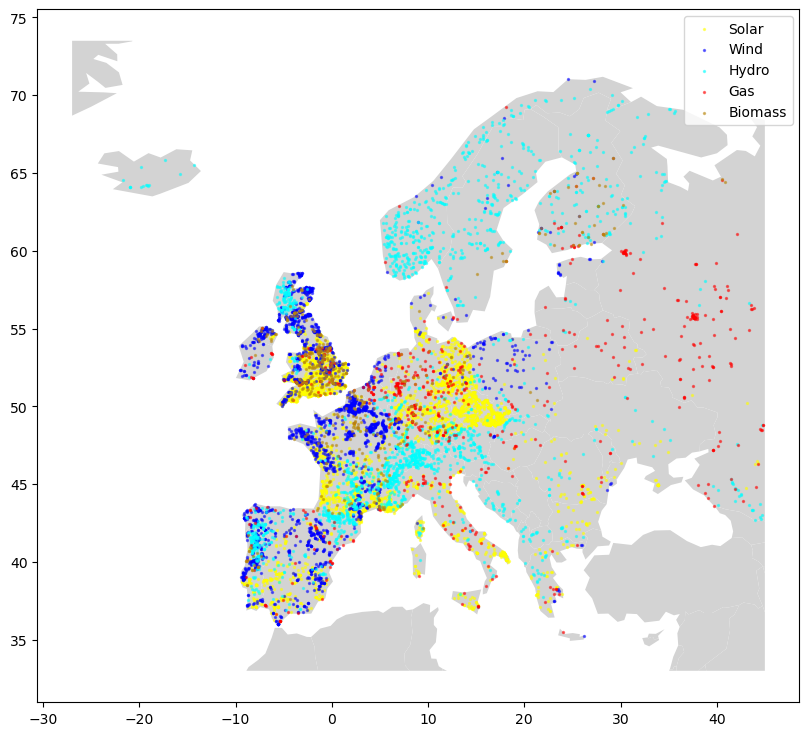

In [67]:
# Create dictionary containing colors for each top_5 fuel kind
colors = {
    "Solar": "yellow",
    "Wind": "blue",
    "Hydro": "aqua",
    "Gas": "red",
    "Biomass": "darkgoldenrod",
}

# Plot base map
base = europe.plot(facecolor='lightgray')
for fuel in top_5_fuels:
    # Plot each respective fuel
    gdf_europe.loc[gdf_europe["primary_fuel"] == fuel].plot(
        ax=base,                # plotting object to plot over
        marker='o',             # marker shape
        markersize=2,           # marker size
        alpha=0.5,              # transparency
        color = colors[fuel],   # color
        label = fuel            # name in legend
)           
base.legend() # show legend

**Still pretty ugly although more informative than the original plot**

For further analysis let's add a new column which decides whether the fuel type is "green", i.e. sustainable, or not.

**Feel free to add further categories or change the definition of sustainable energy**

In [68]:
gdf['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [69]:
green_fuels = ['Hydro', 'Solar', 'Wind', 'Biomass', 'Wave and Tidal', 'Geothermal']
def is_green(entry):
    return entry in green_fuels

gdf['green'] = gdf['primary_fuel'].apply(is_green)

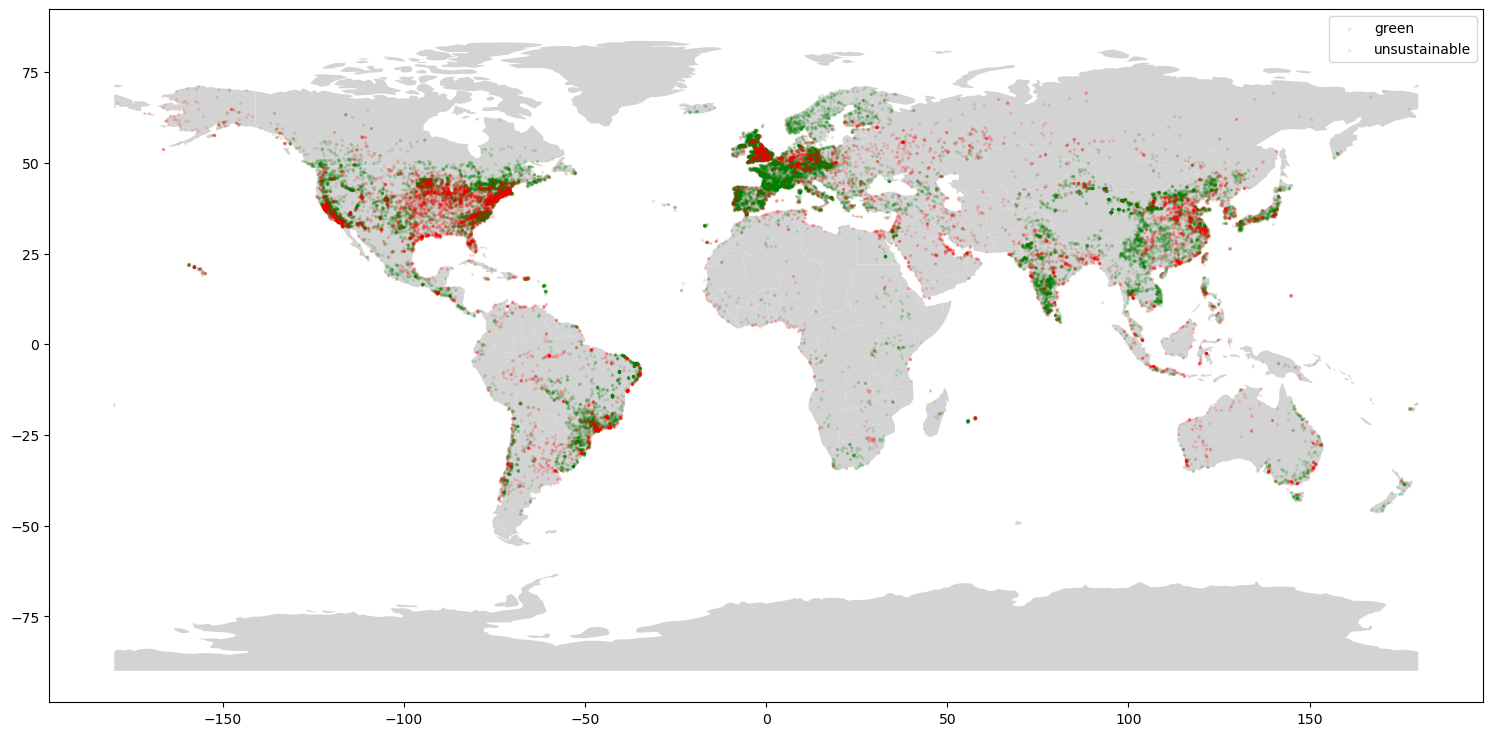

In [70]:
base = world.plot(facecolor='lightgray')

gdf.loc[gdf['green'] == True].plot(ax = base, markersize=2, alpha=0.1, color='green', label='green')
gdf.loc[gdf['green'] == False].plot(ax = base, markersize=2, alpha=0.1, color='red', label='unsustainable')
base.legend()

**The legend directly infers the marker shape, label and color from the plot. Since the low alpha we can barely see the corresponding markers.**
> Hack:

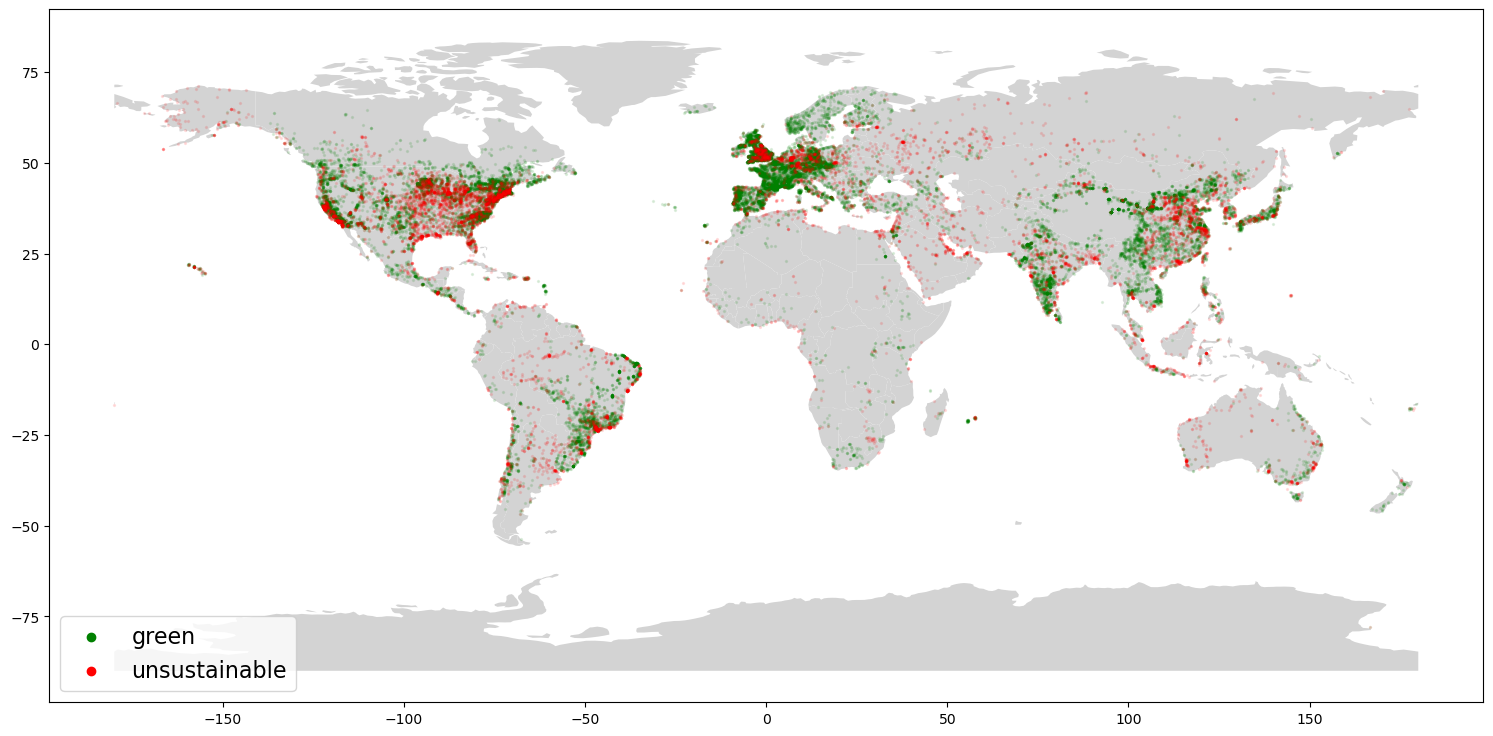

In [71]:
base = world.plot(facecolor='lightgray')

# Add dummy plots (of empty lists -> nothing to be plotted) for correct legend assignment
base.scatter([],[],color='green', marker='o', label='green')
base.scatter([],[],color='red', marker='o', label='unsustainable')

gdf.loc[gdf['green'] == True].plot(ax = base, markersize=2, alpha=0.1, color='green')
gdf.loc[gdf['green'] == False].plot(ax = base, markersize=2, alpha=0.1, color='red')
base.legend(fontsize=16)

**Regional focus - Germany**

In [72]:
filtered = world[world.name == "Germany"]

In [73]:
gdf_germany = gdf.loc[gdf['country'] == "Germany"].copy()

In [74]:
germany = gpd.overlay(world, filtered, how='intersection')
germany.set_crs('epsg:4326', inplace=True)

C:\Users\zak\AppData\Local\Temp\ipykernel_23928\4043218794.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 9 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  germany = gpd.overlay(world, filtered, how='intersection')


,pop_est_1,continent_1,name_1,iso_a3_1,gdp_md_est_1,pop_est_2,continent_2,name_2,iso_a3_2,gdp_md_est_2,geometry
0,83132799.0,Europe,Germany,DEU,3861123,83132799.0,Europe,Germany,DEU,3861123,"POLYGON ((14.35332 53.24817, 14.07452 52.98126..."


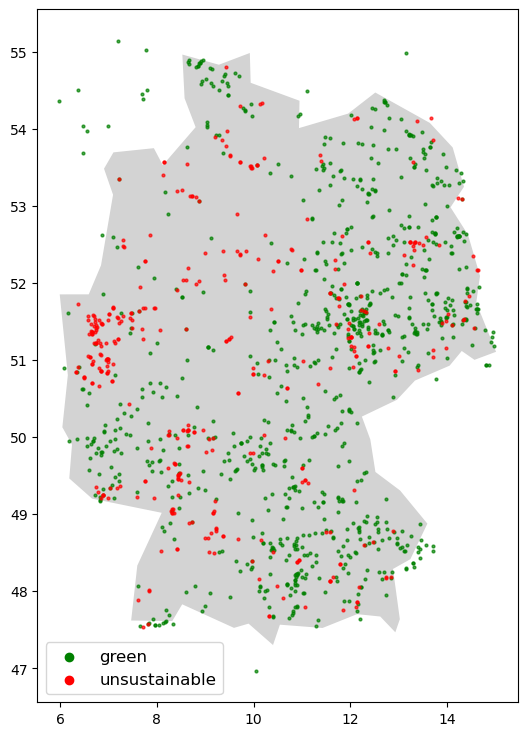

In [75]:
base = germany.plot(facecolor='lightgray')
# Add dummy plots (of empty lists -> nothing to be plotted) for correct legend assignment
base.scatter([],[],color='green', marker='o', label='green')
base.scatter([],[],color='red', marker='o', label='unsustainable')

gdf_germany.loc[gdf_germany['green'] == True].plot(ax = base, markersize=4, alpha=0.7, color='green')
gdf_germany.loc[gdf_germany['green'] == False].plot(ax = base, markersize=4, alpha=0.7, color='red')
base.legend(fontsize=12)

## Variable size of plotted points

We can also add a column name as `markersize` argument inside the plotting method.

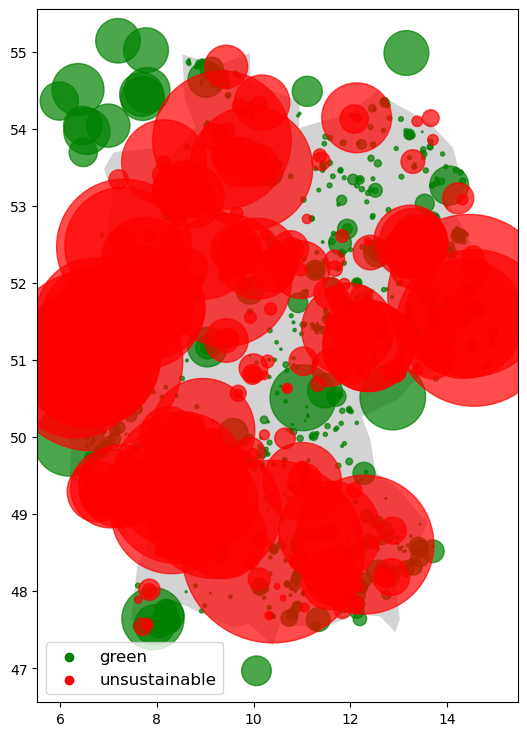

In [76]:
base = germany.plot(facecolor='lightgray')
# Add dummy plots (of empty lists -> nothing to be plotted) for correct legend assignment
base.scatter([],[],color='green', marker='o', label='green')
base.scatter([],[],color='red', marker='o', label='unsustainable')

gdf_germany.loc[gdf_germany['green'] == True].plot(ax = base, markersize="estimated_generation_gwh_2020", alpha=0.7, color='green')
gdf_germany.loc[gdf_germany['green'] == False].plot(ax = base, markersize="estimated_generation_gwh_2020", alpha=0.7, color='red')
base.legend(fontsize=12)

**Normalizing the values**

The resulting values are way too big. Before we have set `markersize = 4` and now the values of the column are taken which can be far greater than that.

One way to deal with that, is to scale the data beforehand.

**E.g. Scale data to a set upper bound $m \cdot \frac{x}{max(x)}$**

The maximum value in $x$ will now be equal to $m$ and all other values will keep the same relative distance to it.

This may result in many very small points depending on the distribution of $x$.

In [77]:
upper_bound = 400
gdf_germany['estimated_generation_gwh_2020_scaled'] = upper_bound * gdf_germany['estimated_generation_gwh_2020'] / gdf_germany['estimated_generation_gwh_2020'].max()

In [78]:
gdf_germany['estimated_generation_gwh_2020_scaled'].describe()

count    1256.000000
mean        8.558894
std        33.285723
min         0.028927
25%         0.174892
50%         0.400695
75%         2.279612
max       400.000000
Name: estimated_generation_gwh_2020_scaled, dtype: float64

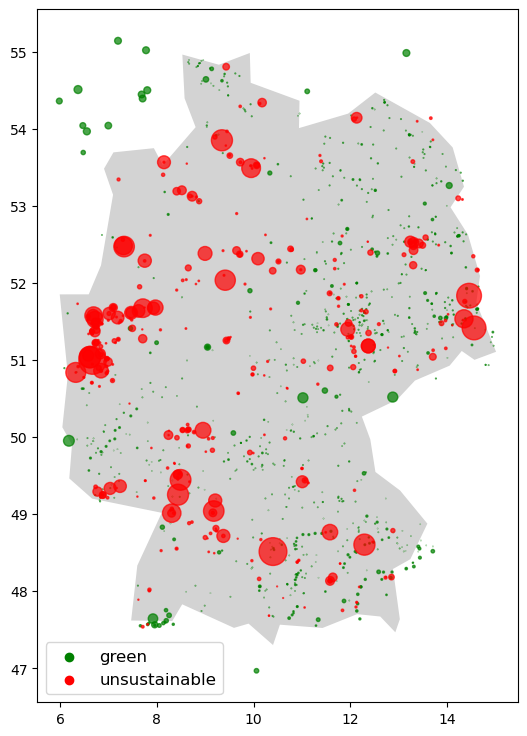

In [79]:
base = germany.plot(facecolor='lightgray')
# Add dummy plots (of empty lists -> nothing to be plotted) for correct legend assignment
base.scatter([],[],color='green', marker='o', label='green')
base.scatter([],[],color='red', marker='o', label='unsustainable')

gdf_germany.loc[gdf_germany['green'] == True].plot(ax = base, markersize="estimated_generation_gwh_2020_scaled", alpha=0.7, color='green')
gdf_germany.loc[gdf_germany['green'] == False].plot(ax = base, markersize="estimated_generation_gwh_2020_scaled", alpha=0.7, color='red')
base.legend(fontsize=12)

**E.g. Min-Max Scaling between $[a,b]$: $a + \frac{(x-min(x)) \cdot (b - a)}{max(x) - min(x)}$**

This way we can control both the minimum and maximum values in which our values will end up.

In [82]:
from helper import minmax_scaler

In [83]:
gdf_germany['estimated_generation_gwh_2020_scaled'] = minmax_scaler(gdf_germany['estimated_generation_gwh_2020'], lower_bound=4, upper_bound=400)
gdf_germany['estimated_generation_gwh_2020_scaled'].describe()

count    1256.000000
mean       12.445278
std        32.955249
min         4.000000
25%         4.144516
50%         4.368077
75%         6.228339
max       400.000000
Name: estimated_generation_gwh_2020_scaled, dtype: float64

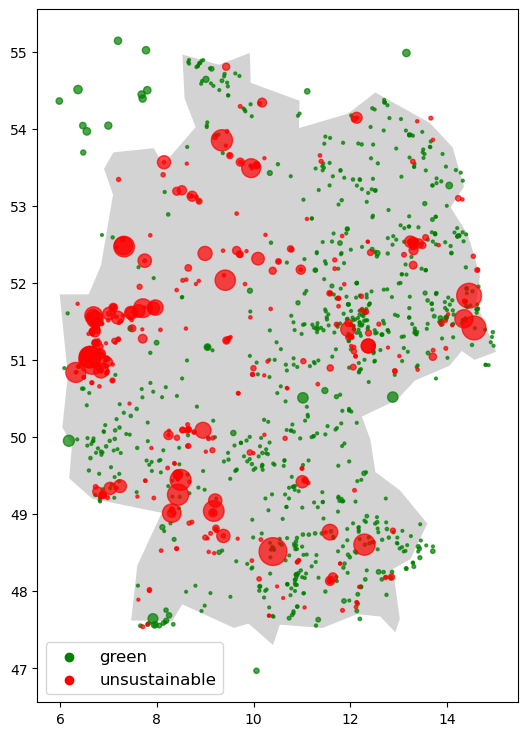

In [84]:
base = germany.plot(facecolor='lightgray')
# Add dummy plots (of empty lists -> nothing to be plotted) for correct legend assignment
base.scatter([],[],color='green', marker='o', label='green')
base.scatter([],[],color='red', marker='o', label='unsustainable')

gdf_germany.loc[gdf_germany['green'] == True].plot(ax = base, markersize="estimated_generation_gwh_2020_scaled", alpha=0.7, color='green')
gdf_germany.loc[gdf_germany['green'] == False].plot(ax = base, markersize="estimated_generation_gwh_2020_scaled", alpha=0.7, color='red')
base.legend(fontsize=12)

We notice that the "big" dots stayed somewhat similar whereas the smaller ones grew.

## Even more colorful plots

We offer a function to produce plots using earth projections you may be more familiar with.

Feel free to take a look at it, the source file can be found in `src/helper.py`.

In [85]:
from helper import cuteplot

In [ ]:
?cuteplot

(<Figure size 2000x900 with 1 Axes>, <GeoAxesSubplot: >)

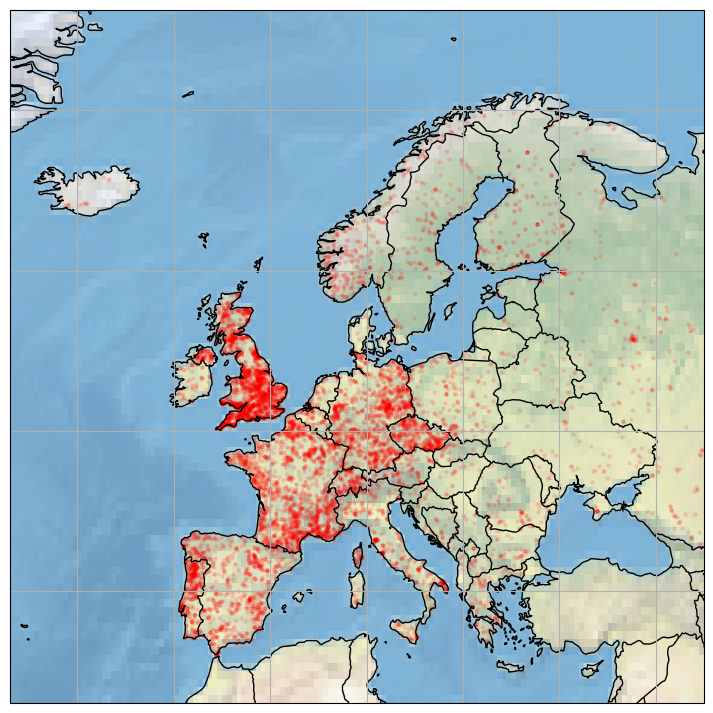

In [86]:
cuteplot(gdf_europe)

In [ ]:
cuteplot(gdf_europe.loc[gdf_europe["primary_fuel"] == "Solar"], color = "blue", alpha = 0.5)

In [ ]:
cuteplot(gdf_europe.loc[gdf_europe["primary_fuel"] == "Solar"], color = "blue", alpha = 0.5)

**The function returns a `Figure` and `Axes` object. Allowing for further manipulation. For example setting a title as shown here**

In [ ]:
fig, ax = cuteplot(gdf.loc[gdf["primary_fuel"] == "Hydro"], color = "blue", alpha = 0.3, map_extent=None, label = "Solar")

ax.set_title("Hydro Power Plants across the Earth", size=24)

**We can also pass the ax object back inside and plot further points on top**

In [ ]:
cuteplot(gdf.loc[gdf["primary_fuel"] == "Coal"], color = "red", alpha = 0.3, map_extent=None, label = "Coal", ax = ax)

In [ ]:
ax.legend(fontsize=16)
ax.set_title("Hydro and Coal Powerplants across the earth", size=24)
fig

**There is also an option to plot a Kernel-Density Plot by setting `kdp = True`**

> Note this only works with `crs = "PlateCarree"`

In [ ]:
fig, ax = cuteplot(gdf.loc[gdf['primary_fuel'] == 'Solar'].sample(1000), map_extent=None, kdp=True, crs="PlateCarree", bw = 0.1)

ax.set_title("Power Plants across the Earth", size=30)

## Saving our Dataframe to disk for further analysis

We spend quite a lot of time for prepating our dataset for our analysis. At the end we want to save our dataframe to disk so that we can load this work state at every time again. There exist plenty of options, in this tutorial we want to use the `pickle` library to serialize our dataframe:

In [ ]:
gdf_world = gpd.overlay(gdf, world, how='intersection')

In [ ]:
gdf_world = gdf_world[['country code', 'country', 'name of powerplant', 'capacity in MW',
       'latitude', 'longitude', 'primary_fuel', 'start date', 'owner of plant',
       'geolocation_source', 'estimated_generation_gwh_2020', 'green', 'continent', 'geometry']]

In [ ]:
gdf_europe = gpd.sjoin(gdf_world.loc[gdf_world['continent'] == "Europe"], bb_europe, how="inner", predicate='intersects').drop("index_right", axis=1)
gdf_germany = gdf_world.loc[gdf_world['country'] == "Germany"]

In [ ]:
## uncomment to serialize the data to disk
import pickle
pickle.dump(gdf_world, open("../data/gdf_world.p", "wb"))
pickle.dump(gdf_europe, open("../data/gdf_europe.p", "wb"))
pickle.dump(gdf_germany, open("../data/gdf_germany.p", "wb"))

## Ready!! Now it's your turn :-)